In [11]:
import numpy as np

file_path = 'digit_123.mat'
# 创建一个字典，用来存储我们从文件中解析出来的所有变量
parsed_data = {}

# 'with open' 会帮我们安全地打开和关闭文件
with open(file_path, 'r') as f:
    current_var_name = None
    current_var_data = []
    
    # 逐行读取文件
    for line in f:
        # 去掉行首行尾的空白字符
        line = line.strip()
        
        # 如果是注释行
        if line.startswith('#'):
            # 如果这行是变量名定义，说明一个新数据块开始了
            if line.startswith('# name:'):
                # 在开始新数据块之前，先把上一个数据块保存起来
                if current_var_name and current_var_data:
                    # 将收集到的字符串数据转换成numpy数组
                    array = np.array(current_var_data, dtype=float)
                    parsed_data[current_var_name] = array
                
                # 获取新的变量名，并清空数据列表，准备接收新数据
                current_var_name = line.split(':')[-1].strip()
                current_var_data = []
            # 其他注释行直接跳过
            continue
        
        # 如果是数据行，就把它按空格分割，然后加到当前变量的数据列表中
        if line: # 确保不是空行
            current_var_data.extend(line.split())

# 循环结束后，不要忘记保存最后一个读取的数据块
if current_var_name and current_var_data:
    array = np.array(current_var_data, dtype=float)
    parsed_data[current_var_name] = array

# --- 解析完成，我们来查看一下结果 ---
print("✅ 文件解析成功！")
print("在文件中找到了以下变量：", list(parsed_data.keys()))
print("-" * 20)

# 打印出每个变量的形状 (shape)
for name, data in parsed_data.items():
    print(f"变量 '{name}' 的形状: {data.shape}")

# 现在，你可以像使用字典一样，通过变量名来访问数据了
# 例如，获取 'testx' 的数据
testx_data = parsed_data.get('testx')
if testx_data is not None:
    print("\n成功获取 'testx' 数据，它的前5个值是:")
    print(testx_data[:5])

✅ 文件解析成功！
在文件中找到了以下变量： ['ans', 'testx', 'testy', 'trainx', 'trainy']
--------------------
变量 'ans' 的形状: (2,)
变量 'testx' 的形状: (7680,)
变量 'testy' 的形状: (30,)
变量 'trainx' 的形状: (7680,)
变量 'trainy' 的形状: (30,)

成功获取 'testx' 数据，它的前5个值是:
[-0.99999988 -0.99999988 -0.99999988 -0.99998307 -0.99836063]


In [12]:
# --- 步骤 2: 将一维数据重塑为二维矩阵 ---

# 从我们解析好的字典里，先把所有数据拿出来
ans_data = parsed_data['ans']
test_x_1d = parsed_data['testx']
test_y_1d = parsed_data['testy']
train_x_1d = parsed_data['trainx']
train_y_1d = parsed_data['trainy']

# 根据样本数和特征数，定义矩阵的形状
num_test_samples = 30
num_train_samples = 30 
num_features = 256

# 使用 .reshape() 函数进行重塑
test_x = test_x_1d.reshape(num_test_samples, num_features)
train_x = train_x_1d.reshape(num_train_samples, num_features)

print("✅ 数据重塑成功!")
print(f"重塑后 'test_x' 的形状: {test_x.shape}")
print(f"重塑后 'train_x' 的形状: {train_x.shape}")
print(f"测试集标签 'test_y_1d' 的形状: {test_y_1d.shape}")
print(f"训练集标签 'train_y_1d' 的形状: {train_y_1d.shape}")

# 现在，train_x 和 test_x 就是标准的机器学习输入格式了

✅ 数据重塑成功!
重塑后 'test_x' 的形状: (30, 256)
重塑后 'train_x' 的形状: (30, 256)
测试集标签 'test_y_1d' 的形状: (30,)
训练集标签 'train_y_1d' 的形状: (30,)


/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36825 (\N{CJK UNIFIED IDEOGRAPH-8FD9}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


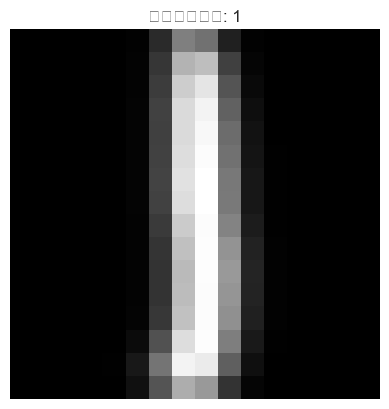

In [13]:
import matplotlib.pyplot as plt

# 让我们来查看训练集中的第一个样本
# train_x 的第一行就是第一个样本的数据
first_image_vector = train_x[0] 
# train_y_1d 的第一个元素就是它的标签
first_image_label = train_y_1d[0]

# 将 256 个元素的一维向量重塑为 16x16 的二维矩阵
image_matrix = first_image_vector.reshape(16, 16)

# 使用 matplotlib 的 imshow 函数来显示图像
# cmap='gray' 表示使用灰度色谱，数字大=白色，数字小=黑色
plt.imshow(image_matrix, cmap='gray')
plt.title(f"这是一个数字: {int(first_image_label)}") # 将标签显示在标题中
plt.axis('off') # 不显示坐标轴
plt.show()

/var/folders/xh/w8n362517zndsxkj07llvjt80000gn/T/ipykernel_43970/1293454960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_y_1d.astype(int), palette="viridis")
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Ari

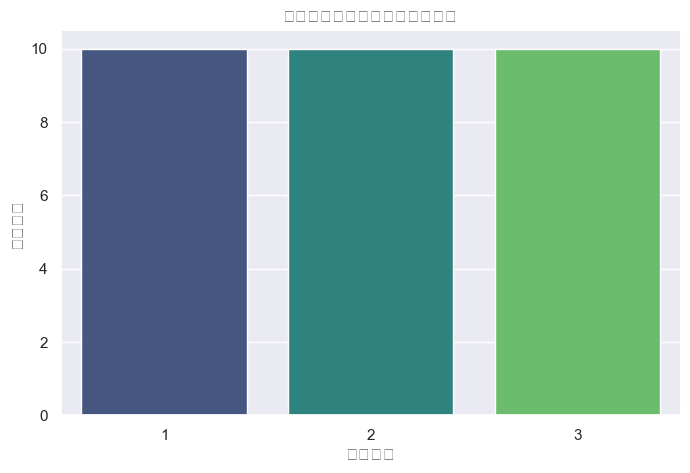

各数字的样本数:
{np.float64(1.0): np.int64(10), np.float64(2.0): np.int64(10), np.float64(3.0): np.int64(10)}


In [14]:
import seaborn as sns
import numpy as np

# 设置绘图风格
sns.set(style="darkgrid")

# 绘制条形图来显示每个标签的数量
plt.figure(figsize=(8, 5)) # 设置画布大小
sns.countplot(x=train_y_1d.astype(int), palette="viridis")

plt.title("训练集中各数字的样本数量分布")
plt.xlabel("数字标签")
plt.ylabel("样本数量")
plt.show()

# 也可以用 numpy 直接打印出具体的数字
unique, counts = np.unique(train_y_1d, return_counts=True)
print("各数字的样本数:")
print(dict(zip(unique, counts)))

/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec

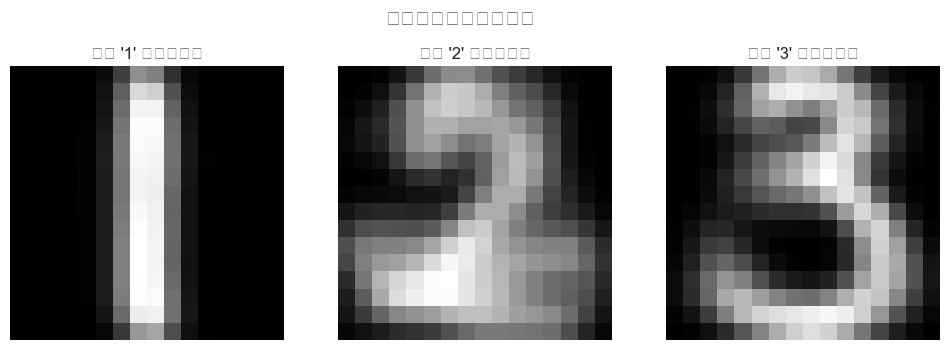

In [15]:
# 创建一个 1x3 的子图网格，用来并排显示3个数字的平均图像
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 我们要看的数字是 1, 2, 3
labels_to_show = [1, 2, 3]

for i, label in enumerate(labels_to_show):
    # 1. 找到所有标签为当前数字的图像
    #    train_y_1d == label 会返回一个布尔数组 [True, False, True, ...]
    #    train_x[...] 会根据这个布尔数组筛选出对应的行
    images_of_a_digit = train_x[train_y_1d == label]
    
    # 2. 计算这些图像的平均值
    #    axis=0 表示沿着行的方向（样本方向）进行平均
    mean_image = images_of_a_digit.mean(axis=0)
    
    # 3. 将平均后的一维向量重塑为 16x16 图像
    mean_image_matrix = mean_image.reshape(16, 16)
    
    # 4. 在对应的子图上显示图像
    ax = axes[i]
    ax.imshow(mean_image_matrix, cmap='gray')
    ax.set_title(f"数字 '{label}' 的平均图像")
    ax.axis('off')

plt.suptitle("各数字的平均图像对比")
plt.show()